In [1]:
import tensorflow as tf
import sionna as sn
import numpy as np
import cv2, os, math
import matplotlib.pyplot as plt

from PIL import Image
from skimage.metrics import structural_similarity as ssim

In [6]:
# 원본 이미지와 복원 이미지가 저장된 폴더 경로
original_folder = "resized_images"
restored_folder = "result_Proposed/SNR_1"

In [ ]:
# 원본 및 통신 완료된 이미지의 PSNR 구하기

def calculate_psnr(original, restored):
    mse = np.mean((original - restored) ** 2)
    if mse == 0:  # MSE가 0이면 완벽히 동일한 이미지이므로 PSNR은 무한대
        return float('inf')
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

# 두 폴더에 있는 파일들을 차례대로 비교
for filename in os.listdir(original_folder):
    if filename.endswith(".png"):  # PNG 파일만 처리
        original_image_path = os.path.join(original_folder, filename)
        restored_image_path = os.path.join(restored_folder, filename)
        
        # 이미지 읽기
        original_image = cv2.imread(original_image_path, cv2.IMREAD_UNCHANGED)
        restored_image = cv2.imread(restored_image_path, cv2.IMREAD_UNCHANGED)
        
        # PSNR 계산
        psnr_value = calculate_psnr(original_image, restored_image)
        print(f"{psnr_value}")

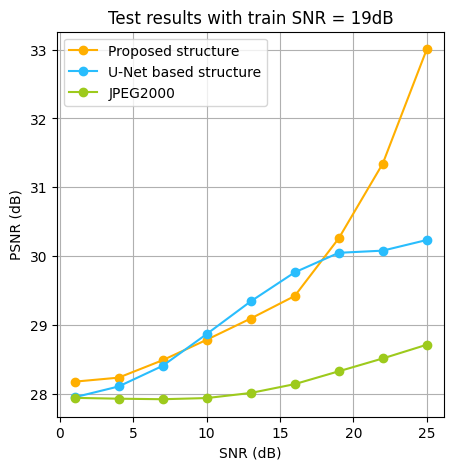

In [20]:
# PSNR 그래프

# SNR 값
snr_values = [1, 4, 7, 10, 13, 16, 19, 22, 25]

# 각 모델의 PSNR 값
proposed_psnr = [28.17343477, 28.23177838, 28.48517928, 28.78188445, 29.09094881, 29.4189684, 30.25627517, 31.34392929, 33.00678253]
unet_psnr = [27.94652031,
28.10333944,
28.40296915,
28.86498487,
29.34020762,
29.76248543,
30.04682284,
30.07840214,
30.23323159
]
jpeg2000_psnr = [27.93809197, 27.92597026, 27.9182155, 27.93493935, 28.00885795, 28.13751776, 28.3240752, 28.51099787, 28.71050735]

# 그래프 그리기
plt.figure(figsize=(5, 5))
plt.plot(snr_values, proposed_psnr, marker='o', label="Proposed structure", color='#FFAF00')
plt.plot(snr_values, unet_psnr, marker='o', label="U-Net based structure", color='#29BDFD')
plt.plot(snr_values, jpeg2000_psnr, marker='o', label="JPEG2000", color='#9DCA1C')

# 그래프 제목 및 축 레이블
plt.title("Test results with train SNR = 19dB (PSNR)")
plt.xlabel("SNR (dB)")
plt.ylabel("PSNR (dB)")

# 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()


In [73]:
# 원본 이미지와 복원 이미지가 저장된 폴더 경로
original_folder = "resized_images"
restored_folder = "result_Proposed/SNR_25"

In [74]:
def calculate_msssim(original, restored):
    # MS-SSIM 계산 (이미지 다채널을 지정하여 처리)
    msssim_value = ssim(
        original, 
        restored, 
        channel_axis=-1,       # 채널 축을 명시적으로 설정
        gaussian_weights=True,   # MS-SSIM에 필요한 가우시안 가중치 사용
        use_sample_covariance=False, 
        full=False, 
        win_size=7,               # win_size 명시적으로 설정
        data_range=255          # 이미지의 픽셀 값 범위 명시 (0~255)
    )
    return msssim_value

# 두 폴더에 있는 파일들을 차례대로 비교
for filename in os.listdir(original_folder):
    if filename.endswith(".png"):  # PNG 파일만 처리
        original_image_path = os.path.join(original_folder, filename)
        restored_image_path = os.path.join(restored_folder, filename)
        
        # 이미지 읽기 (이미지를 float32로 변환하여 사용)
        original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR).astype(np.float32)
        restored_image = cv2.imread(restored_image_path, cv2.IMREAD_COLOR).astype(np.float32)

        # MS-SSIM 계산
        msssim_value = calculate_msssim(original_image, restored_image)
        print(f"{msssim_value}")

0.8605146408081055
0.8582392334938049
0.8621008992195129
0.8489747643470764
0.8941812515258789
0.8254990577697754
0.8876155018806458
0.8814222812652588
0.8854067921638489
0.8988583087921143
0.8409684300422668
0.9010979533195496
0.8476424217224121
0.8834502696990967
0.8336620330810547
0.8529365062713623
0.8860638737678528
0.8134269118309021
0.8685417175292969
0.895030677318573
0.8763329386711121


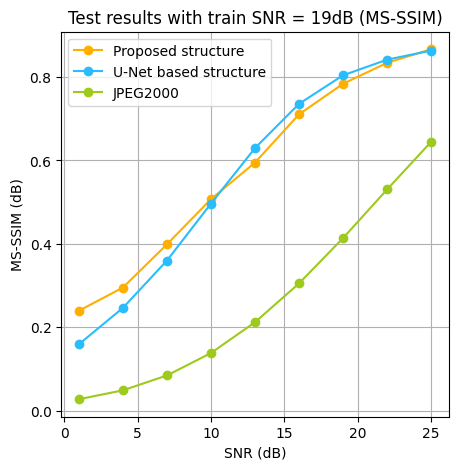

In [76]:
# SNR 값
snr_values = [1, 4, 7, 10, 13, 16, 19, 22, 25]

# 각 모델의 PSNR 값
proposed_msSSIM = [0.239458607,
0.295151547,
0.398749207,
0.507171348,
0.594990058,
0.710596195,
0.783937304,
0.834126853,
0.866760308
]
unet_msSSIM = [0.15907664,
0.246429629,
0.35986837,
0.496622774,
0.629709474,
0.735867222,
0.804253513,
0.841734951,
0.863509839
]
jpeg2000_msSSIM = [0.027299404,
0.048667632,
0.08428242,
0.138091612,
0.212008853,
0.30512138,
0.413874142,
0.53047053,
0.644767741
]

# 그래프 그리기
plt.figure(figsize=(5, 5))
plt.plot(snr_values, proposed_msSSIM, marker='o', label="Proposed structure", color='#FFAF00')
plt.plot(snr_values, unet_msSSIM, marker='o', label="U-Net based structure", color='#29BDFD')
plt.plot(snr_values, jpeg2000_msSSIM, marker='o', label="JPEG2000", color='#9DCA1C')

# 그래프 제목 및 축 레이블
plt.title("Test results with train SNR = 19dB (MS-SSIM)")
plt.xlabel("SNR (dB)")
plt.ylabel("MS-SSIM (dB)")

# 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()
